In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
a=np.arange(1,10,2)
print(a)
a.sum()

[1 3 5 7 9]


25

In [5]:
a.min()

1

In [6]:
a.max()

9

$$ \mu = \frac{1}{n} \sum_{i=1}^{n} x_i $$

In [8]:
a.sum()/len(a)



5.0

In [9]:
a.mean()

5.0

$$ \sigma^2 = {\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2} $$


In [11]:
sum((a-np.mean(a))**2)/len(a)


8.0

In [12]:
a.var()

8.0

### Среднеквадратическое отклонение

$$ \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2} $$


In [13]:
np.sqrt(sum((a-np.mean(a))**2)/len(a))

2.8284271247461903

In [14]:
a.std()

2.8284271247461903

In [16]:
import seaborn as sns

In [ ]:
! pip install seaborn

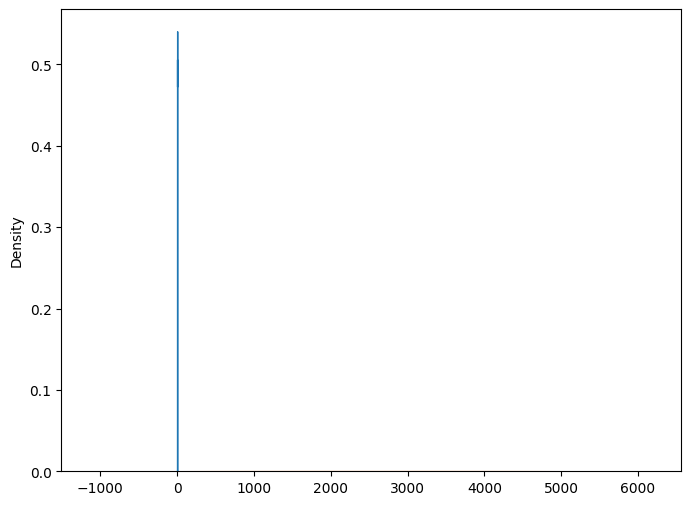

In [25]:
n_points = 500

x1= 2 * np.random.rand(n_points, 1).reshape(n_points)
x2= np.random.randint(50,5000, size=n_points)

plt.figure(figsize=(8,6))

sns.kdeplot(x=x1,label="x1",fill=True)
sns.kdeplot(x=x2,label="x2",fill=True)
plt.show()

In [26]:
print(x1.min(),x1.max())
print(x2.min(),x2.max())

0.0014106143004131155 1.9985391031512263
61 4995


In [27]:
def GD_multi(x,y,alpha=0.001,iter=100):
    n_samples, n_features = x.shape  
    
    theta = np.array([-7,-10])
    trajectory = [(theta[0],theta[1])]
       
    for _ in range(iter):
        y_pred=x.dot(theta)
        gradient = (2 / n_samples) * x.T.dot(y_pred - y)        
        theta = theta - alpha * gradient
        trajectory.append((theta[0],theta[1]))
            
                
    return theta,trajectory

def add_bias_feature(X):     
     return np.column_stack((np.ones(len(X)), X))
    
def mse_loss(w0, w1, x1,x2, y):
    y_pred = w0 * x1 + w1 * x2 
    return np.mean((y - y_pred) ** 2)

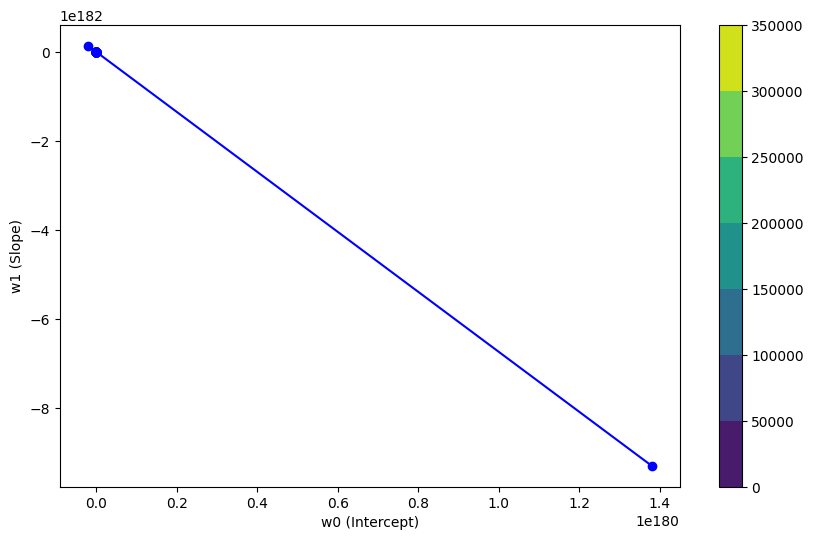

In [65]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50
w1 = 3.5  
w2 = 0.02 
y = w1 * x1 + w2 * x2 
X=np.column_stack((x1,x2))



w,trajectory=GD_multi(X,y,iter=100,alpha=0.01)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x1,x2, y) for t0 in theta_0] for t1 in theta_1])
plt.figure(figsize=(10,6))
cp = plt.contour(t0, t1, Z, colors='white', linewidths=1,levels=50)

cp = plt.contourf(t0, t1, Z )
plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.show()


In [66]:
def z_score_scaling(data):
    mean = np.mean(data,axis=0)
    std_dev = np.std(data,axis=0)
    scaled_data = (data-mean)/std_dev
    return scaled_data
    

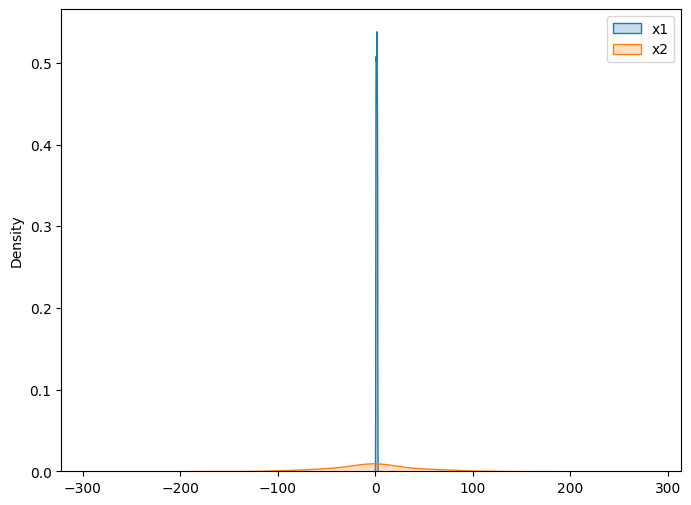

In [67]:

plt.figure(figsize=(8,6))
sns.kdeplot(x=x1, label="x1", fill=True)
sns.kdeplot(x=x2, label="x2", fill=True)
plt.legend()
plt.show()

In [68]:
def z_score_scaling(data):    
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)    
    scaled_data = (data - mean) / std_dev
    return scaled_data


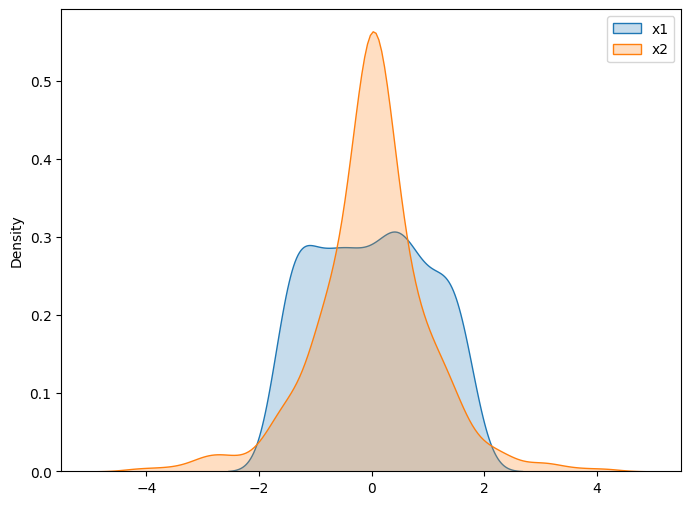

In [69]:
x1_scaling=z_score_scaling(x1)
x2_scaling=z_score_scaling(x2)
plt.figure(figsize=(8,6))
sns.kdeplot(x=x1_scaling, label="x1", fill=True)
sns.kdeplot(x=x2_scaling, label="x2", fill=True)
plt.legend()
plt.show()

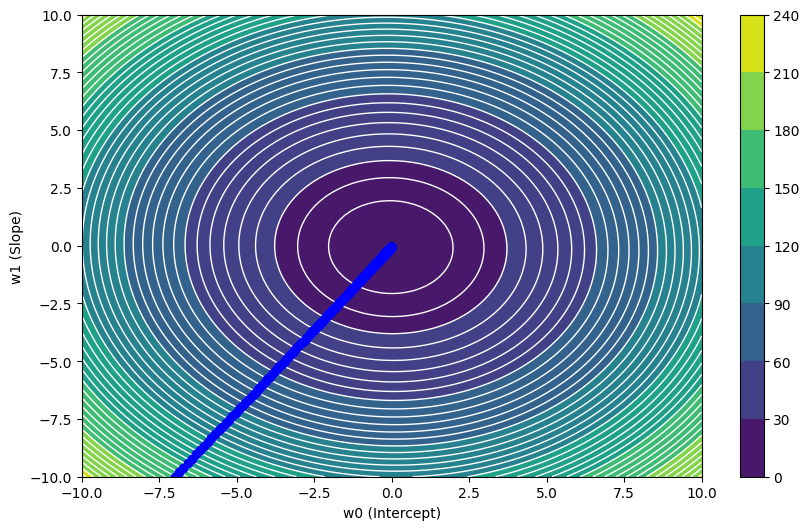

In [70]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50

x1_scaling=z_score_scaling(x1)
x2_scaling=z_score_scaling(x2)

X=np.column_stack((x1_scaling,x2_scaling))



w,trajectory=GD_multi(X,y,iter=500,alpha=0.01)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x1_scaling,x2_scaling, y) for t0 in theta_0] for t1 in theta_1])
plt.figure(figsize=(10,6))
cp = plt.contour(t0, t1, Z, colors='white', linewidths=1,levels=50)

cp = plt.contourf(t0, t1, Z )
plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.show()


In [71]:
def Mean_Normal(data):    
    mean = np.mean(data, axis=0)
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)    
    normalized_data = (data - mean) / (max_val - min_val)
    
    return normalized_data

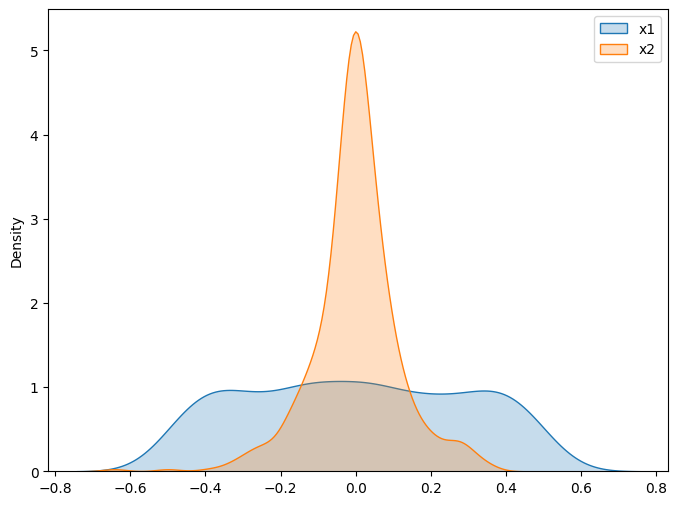

In [72]:

# n_points = 500
# x1=2 * np.random.rand(n_points, 1).reshape(n_points)
# noise = np.random.randn(n_points) 
# x2=x1*noise*50


x1_scaling=Mean_Normal(x1)
x2_scaling=Mean_Normal(x2)
plt.figure(figsize=(8,6))
sns.kdeplot(x=x1_scaling, label="x1", fill=True)
sns.kdeplot(x=x2_scaling, label="x2", fill=True)
plt.legend()
plt.show()

In [79]:
x2_scaling.min()

-0.45899268267062304

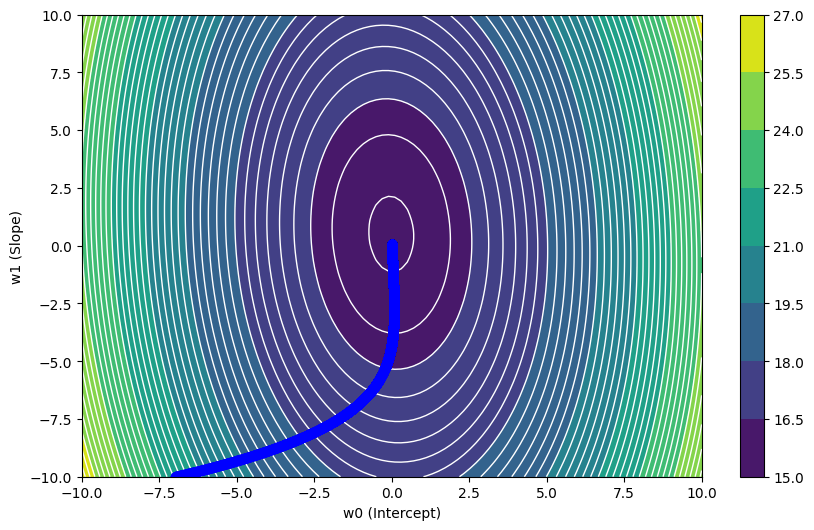

In [73]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50

x1_scaling=Mean_Normal(x1)
x2_scaling=Mean_Normal(x2)

X=np.column_stack((x1_scaling,x2_scaling))

w,trajectory=GD_multi(X,y,iter=10000,alpha=0.01)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x1_scaling,x2_scaling, y) for t0 in theta_0] for t1 in theta_1])
plt.figure(figsize=(10,6))
cp = plt.contour(t0, t1, Z, colors='white', linewidths=1,levels=50)

cp = plt.contourf(t0, t1, Z )
plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.show()

In [80]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50

In [82]:
def MaxScaling(data):
    max_val= np.max(data,axis=0)
    normalized_data= data / np.abs(max_val)    
    return normalized_data


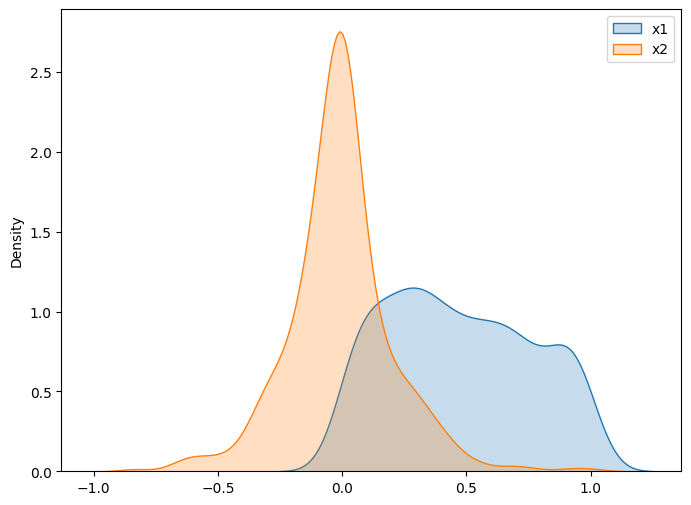

In [84]:
x1_scaling=MaxScaling(x1)
x2_scaling=MaxScaling(x2)
plt.figure(figsize=(8,6))
sns.kdeplot(x=x1_scaling, label="x1", fill=True)
sns.kdeplot(x=x2_scaling, label="x2", fill=True)
plt.legend()
plt.show()

[ 3.51999998e+00 -6.19310878e-07]


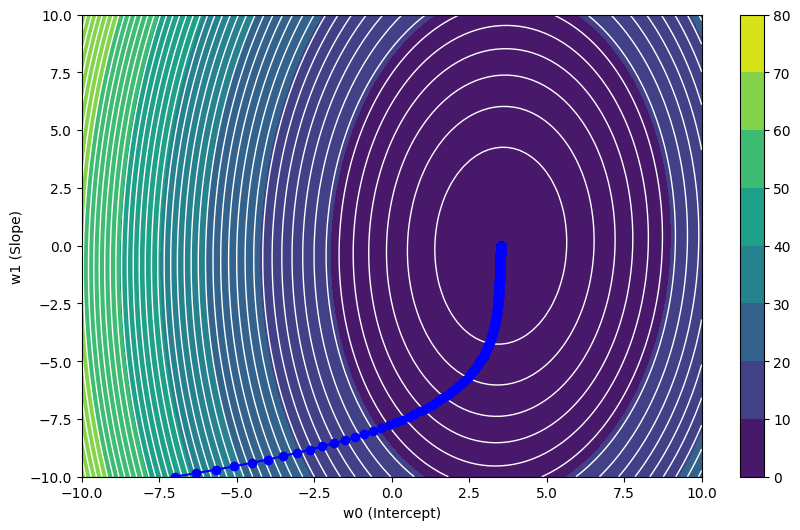

In [85]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*5
x1_scaling=MaxScaling(x1)
x2_scaling=MaxScaling(x2)
w1 = 3.5  
w2 = 0.02 
y = w1 * x1_scaling + w2 * x1_scaling 
X=np.column_stack((x1_scaling,x2_scaling))
w,trajectory=GD_multi(X,y,iter=1000,alpha=0.1)
print(w)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x1_scaling,x2_scaling, y) for t0 in theta_0] for t1 in theta_1])
plt.figure(figsize=(10,6))
cp = plt.contour(t0, t1, Z, colors='white', linewidths=1,levels=50)

cp = plt.contourf(t0, t1, Z )
plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.show()

In [88]:
a=[10,20,30,40]
b=a.copy()
print(a)
print(b)


[10, 20, 30, 40]
[10, 20, 30, 40]


In [89]:
a[0]=50

print(a)
print(b)

[50, 20, 30, 40]
[10, 20, 30, 40]


In [ ]:
! pip install scikit-learn

In [4]:
from sklearn.linear_model import LinearRegression

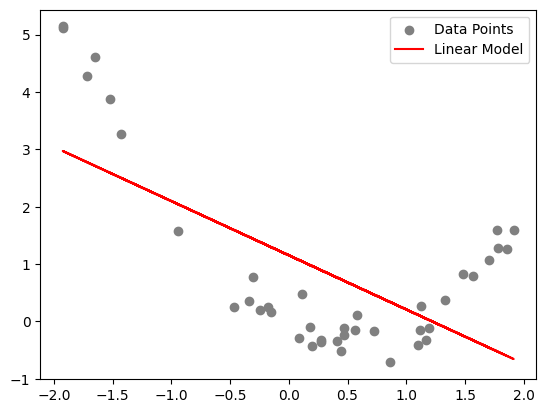

In [95]:
np.random.seed(0)
x = np.random.rand(40, 1) * 4 - 2  
y = x**2 - x + np.random.randn(40, 1) * 0.3  
x_test = np.linspace(-2, 2, 100).reshape(-1, 1)
plt.scatter(x,y,label="Data Points",color='gray')

linear_model = LinearRegression()
linear_model.fit(x,y)
y_pred = linear_model.predict(x)

plt.plot(x,y_pred,label="Linear Model",color="red")

plt.legend()
plt.show()


In [3]:
from sklearn.preprocessing import PolynomialFeatures

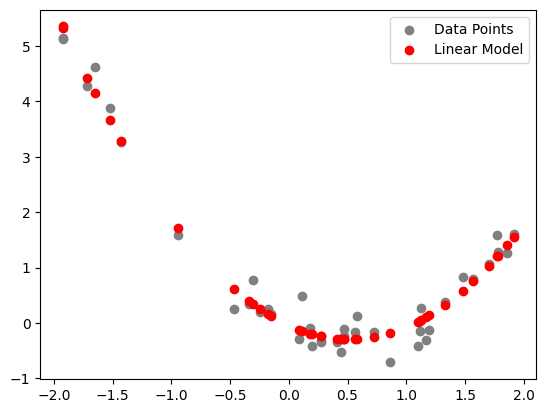

In [109]:
poly = PolynomialFeatures(2,include_bias=False)
X_poly2=poly.fit_transform(x)

plt.scatter(x,y,label="Data Points",color='gray')

linear_model = LinearRegression()
linear_model.fit(X_poly2,y)
y_pred = linear_model.predict(X_poly2)

plt.scatter(x,y_pred,label="Linear Model",color="red")

plt.legend()
plt.show()


(100, 1)


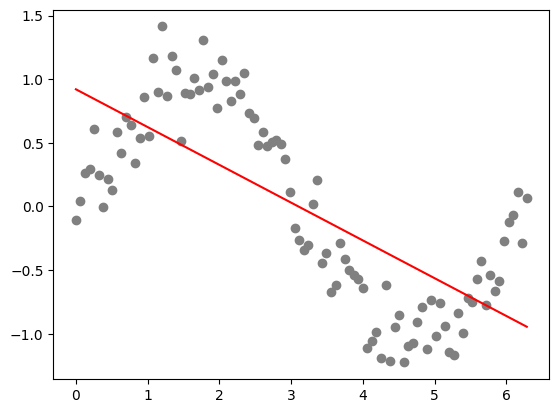

In [8]:
import math
n=100
x=np.linspace(0,2*math.pi,n).reshape(-1,1)

y=np.sin(x)+ 0.22 * np.random.randn(len(x)).reshape(-1,1)
print(x.shape)
linear_model = LinearRegression()

linear_model.fit(x,y)
y_pred=linear_model.predict(x)
plt.scatter(x,y,label="Data" , color="gray")
plt.plot(x,y_pred,label="Pred" , color="red")
plt.show()

(100, 1)


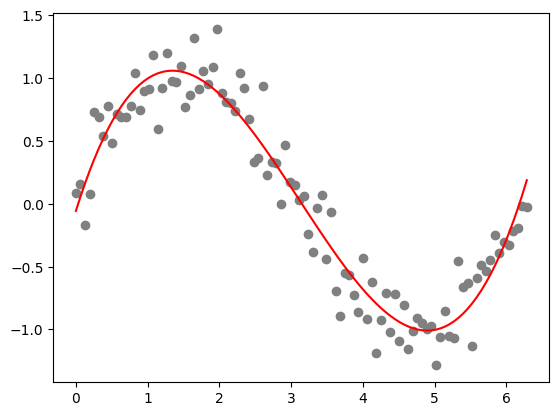

In [10]:
n=100
x=np.linspace(0,2*math.pi,n).reshape(-1,1)
poly = PolynomialFeatures(3,include_bias=False)
X_poly2=poly.fit_transform(x)
y=np.sin(x)+ 0.22 * np.random.randn(len(x)).reshape(-1,1)
print(x.shape)
linear_model = LinearRegression()

linear_model.fit(X_poly2,y)
y_pred=linear_model.predict(X_poly2)
plt.scatter(x,y,label="Data" , color="gray")
plt.plot(x,y_pred,label="Pred" , color="red")
plt.show()


In [ ]:
data=np.genfromtxt('gen_regression.csv', delimiter=',')

sorted_indices = np.argsort(data[:,0])


X_train = data[:, :-1][sorted_indices]  
y_train = data[:, -1][sorted_indices] 
plt.scatter(X_train,y_train)



In [ ]:
import pandas as pd
data = pd.read_csv("house_data.csv")
data.head()

